In [545]:
import pandas as pd
import UserGraph
import importlib
importlib.reload(UserGraph)
import UserGraph

In [546]:
USERS_PATH = '../resources/userbase/users.csv'
EDGES_PATH = '../resources/userbase/teacher_student_connections.csv'

In [547]:
users = pd.read_csv(USERS_PATH)
ts_connection = pd.read_csv(EDGES_PATH)

In [548]:
ug = UserGraph.UserGraph()
ug.build_from_dataframe(users, ts_connection)

In [549]:
ug.add_user(1001, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'Aca',
 'last_name': 'acA',
 'rating_avg_teacher': None,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Biology',
 'learning_subject': 'Mathematics'}
            )
ug.add_user(1002, attributes = {'is_professor': True,
 'is_student': True,
 'first_name': 'acA',
 'last_name': 'AcA',
 'rating_avg_teacher': 4.8,
 'email': 'filip.simona16@gmail.com',
 'teaching_subject': 'Mathematics',
 'learning_subject': 'Biology'}
            )

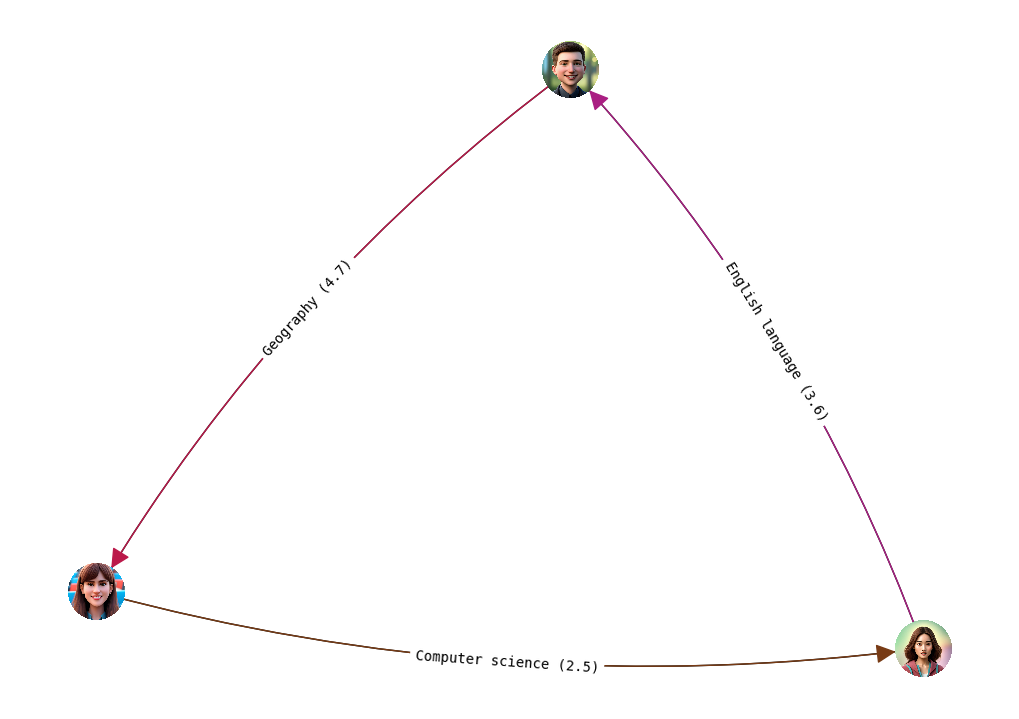

In [550]:
slika = ug.draw_cycle("ON1FcTL1iFZRX8XWHR29NphsMo42", connection_style='arc3,rad=0.1')